# Segundo Projeto - Estatística Aplicada a Computação

Aluno: Guilherme Santos Silva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno

__1.__ Preparação dos dados para a análise:
Antes de iniciar sua análise, é fundamental que você primeiro examine e limpe o conjunto de dados, para tornar o trabalho com ele um processo mais eficiente. Nesta parte, você praticará a correção de tipos de dados, manipulação de valores ausentes e eliminação de colunas e linhas enquanto aprende sobre o conjunto de dados do Stanford Open Policing Project.


In [2]:
# a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos registros policiais estão catalogados;

df = pd.read_csv('police.csv')
df

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


<AxesSubplot:>

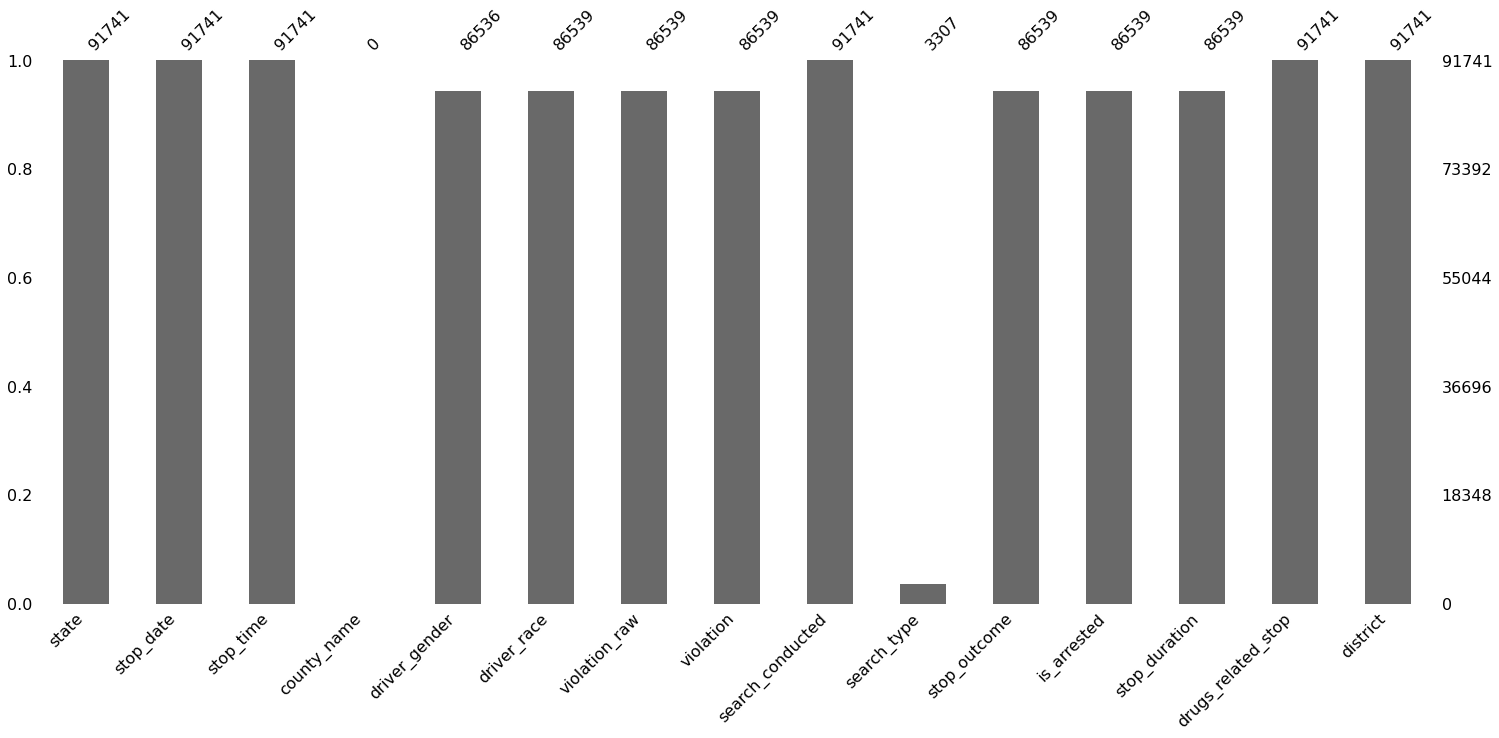

In [56]:
# (b) Conte o número de dados faltosos de cada variável;
# Agora vamos notar a quantidade de dados faltantes. Usei a biblioteca "missingno" pois ele mostra de forma completa quais a colunas que foram totalmente preenchidase quais não foram, de acordo com  o total de linhas totais (Que é 91741 linhas).

missingno.bar(df)

In [4]:
# (c) Como estamos trabalhando somente com dados de um único estado, não faz sentido mantermos informações de variáveis como county_name e state. Exclua essas variáveis do conjunto;

data = df.drop(['county_name', 'state'], axis=1)
data

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [5]:
# (d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises. Como apenas uma pequena fração das linhas está faltando driver_gender, remova essas linhas do conjunto de dados;

data1 = data.dropna(subset = ['driver_gender'])
data1

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [6]:
# (e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted, is_arrested e district; depois compare com os tipos de dados que estão armazena- dos no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados para essas variáveis;
# Nesse caso as variavéis apresentam tipo 'Object' então tive que modificar apenas a variável 'is_arrested'.

data1 = data1.astype({"is_arrested": bool})

In [7]:
# (f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas: stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeando a como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;

data1['stop_datetime'] = pd.to_datetime(data1['stop_date'] + "," + " " + data1['stop_time'] + "", format="%Y-%m-%d, %H:%M")

In [8]:
# (g) Por fim, transforme a coluna stop_datetime no índice do dataframe.
# Como uma coluna foi criada vamos excluir as colunas que foram usadas:

data1 = data1.drop(['stop_date', 'stop_time'], axis=1)
data1.set_index('stop_datetime')

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


__2.__ Análise do gênero sobre as infrações:

O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito? Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito mais!

In [9]:
# (a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados. Construa uma distribuição de frequências da variável violation e responda: qual a infração mais comum e a menos notificada?:

data1['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [10]:
data1['violation'].value_counts(ascending = True).tail(6)

Seat belt               2856
Registration/plates     3703
Other                   4409
Equipment              10921
Moving violation       16224
Speeding               48423
Name: violation, dtype: int64

In [11]:
# (b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela de contingência para frequência absoluta e outra para frequência relativa, contendo a distribuição conjunta das variáveis driver_gender e violation.

data2b = data1[['driver_gender','violation']]

In [12]:
# Para isso iremos analisar criando uma tabela para frequência absoluta e frequência relativa, respectivamente(Coloquei em Inglês por todas as colunas estarem em inglês):

dfb = data2b.value_counts().reset_index()
dfb = dfb.rename(columns = {0 : 'Absolute Frequency'})

In [13]:
datab = data2b.value_counts(normalize = True) * 100
datab = datab.reset_index()
datab = datab.rename(columns = {0 : 'Relative Frequency'})

In [14]:
# Unificando colunas para ficarem melhores visíveis:

me = dfb.merge(datab)
me

,driver_gender,violation,Absolute Frequency,Relative Frequency
0,M,Speeding,32777,37.876722
1,F,Speeding,15646,18.080337
2,M,Moving violation,12938,14.951003
3,M,Equipment,8420,9.730055
4,M,Other,3702,4.277988
5,F,Moving violation,3286,3.797264
6,M,Registration/plates,2647,3.058843
7,F,Equipment,2501,2.890127
8,M,Seat belt,2278,2.632430
9,F,Registration/plates,1056,1.220301


<AxesSubplot:>

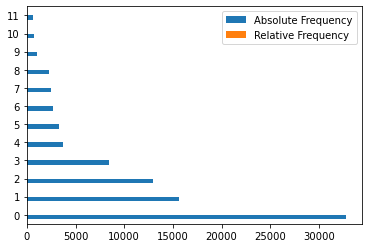

In [15]:
# c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;

me.plot.barh()

In [16]:
# (d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma tabela de contingência considerando as variáveis driver_gender e stop_outcome e então vai comparar a porcentagem de paradas resultados de uma "Citation" versus "Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);

data2d = data1[['driver_gender','stop_outcome']]
data2d

,driver_gender,stop_outcome
0,M,Citation
1,M,Citation
2,M,Citation
3,M,Arrest Driver
4,F,Citation
...,...,...
91736,F,Citation
91737,F,Citation
91738,M,Citation
91739,F,Warning


In [17]:
values = ['Citation','Warning']

fil_df = data2d[data2d.stop_outcome.isin(values)]
fil_df = fil_df.value_counts(normalize = True) * 100
fil_df = fil_df.reset_index()
fil_df= fil_df.rename(columns = {0 : 'Comparativo'})

round(fil_df,2)

,driver_gender,stop_outcome,Comparativo
0,M,Citation,67.91
1,F,Citation,25.84
2,M,Warning,4.44
3,F,Warning,1.81


In [18]:
# (e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta, primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em uma revista de veículo;
# Nesse caso o gênero afeta sim.

data2d['driver_gender'].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

In [19]:
# (f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo tempo usando groupby;

data2d.groupby('driver_gender').size()

driver_gender
F    23774
M    62762
dtype: int64

In [20]:
# (g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

data3 = data1[['driver_gender', 'violation', 'search_conducted']]
valor = ['F']
filtro_data = data3[data3.driver_gender.isin(valor)]
filtro_data = filtro_data.value_counts(normalize = True)*100
filtro_data = filtro_data.reset_index()
filtro_data = filtro_data.rename(columns = {0: 'Taxa de Infração'})
round(filtro_data, 2)

,driver_gender,violation,search_conducted,Taxa de Infração
0,F,Speeding,False,65.26
1,F,Moving violation,False,13.28
2,F,Equipment,False,10.10
3,F,Registration/plates,False,4.20
4,F,Other,False,2.85
5,F,Seat belt,False,2.39
6,F,Speeding,True,0.55
7,F,Moving violation,True,0.54
8,F,Equipment,True,0.42
9,F,Registration/plates,True,0.24


In [21]:
data4 = data1[['driver_gender', 'violation', 'search_conducted']]
valor = ['M']
filtro_data1 = data4[data4.driver_gender.isin(valor)]
filtro_data1 = filtro_data1.value_counts(normalize = True)*100
filtro_data1 = filtro_data1.reset_index()
filtro_data1 = filtro_data1.rename(columns = {0: 'Taxa de Infração'})
round(filtro_data1, 2)

,driver_gender,violation,search_conducted,Taxa de Infração
0,M,Speeding,False,50.77
1,M,Moving violation,False,19.35
2,M,Equipment,False,12.46
3,M,Other,False,5.63
4,M,Registration/plates,False,3.76
5,M,Seat belt,False,3.50
6,M,Speeding,True,1.46
7,M,Moving violation,True,1.27
8,M,Equipment,True,0.96
9,M,Registration/plates,True,0.46


__3.__ Análise exploratória visual dos dados:

É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender as tendências de uma forma que o exame dos dados brutos não pode.


In [22]:
# (a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em todas as paradas no DataFrame, calculando a média da coluna is_arrested;

data1.is_arrested.mean()

0.0355690117407784

In [23]:
# (b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice. A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso, agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate com os valores encontrados da taxa de prisão por hora;

b3 = data1.set_index('stop_datetime')

In [24]:
# Fazendo as médias dos índices agrupados e salvando variável para próximas análises :

print(b3.groupby(b3.index.hour).is_arrested.mean())

hourly_arrest_rate = b3.groupby(b3.index.hour).is_arrested.mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


Text(0.5, 1.0, 'Taxa de prisão por hora do dia')

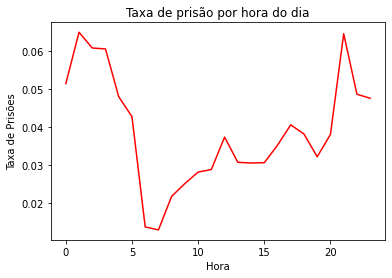

In [25]:
# (c) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora do Dia;

hourly_arrest_rate.plot(color= ['red'])
plt.xlabel('Hora')
plt.ylabel('Taxa de Prisões')
plt.title('Taxa de prisão por hora do dia')

Text(0.5, 1.0, 'Interrupções relacionadas à drogas anualmente')

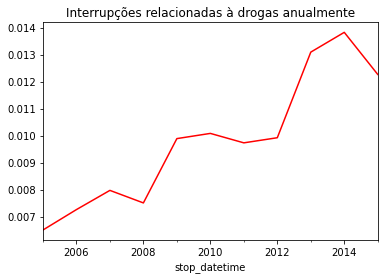

In [33]:
# (d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indicase drogas foram encontradas durante uma determinada parada. Você calculará a taxa anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para visualizar como a taxa mudou ao longo do tempo;

Annual_drug_rate = b3.drugs_related_stop.resample('Y').mean()
Annual_drug_rate.plot(color= ['red'])
plt.title('Interrupções relacionadas à drogas anualmente')

array([<AxesSubplot:xlabel='stop_datetime'>,
       <AxesSubplot:xlabel='stop_datetime'>], dtype=object)

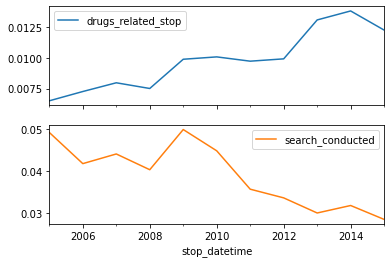

In [34]:
# (e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos. Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo. Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os dados desse resultado da concatenação;
# Unindo colunas para poder plotar gráficos demonstrativos

Annual_search_rate = b3.search_conducted.resample('Y').mean()
ano = pd.concat([Annual_drug_rate, Annual_search_rate], axis='columns')
ano.plot(subplots=True)

In [46]:
# (f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos como zonas. Como as zonas se comparam em termos de quais infrações são detectadas pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas ’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados obtido na tabela, e responda a questão colocada.


print(pd.crosstab(b3.district, b3.violation))
zonas = pd.crosstab(b3.district, b3.violation)

print()

print(zonas.loc['Zone K1':'Zone K3'])
zona = zonas.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1     

Text(0.5, 1.0, 'Principais Infrações por zona')

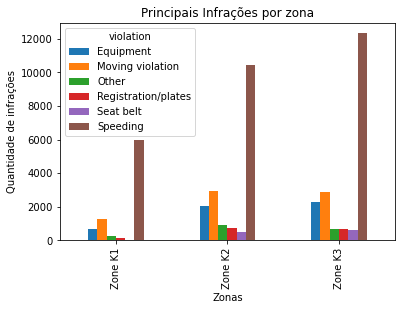

In [49]:
# Aqui criamos gráficos demonstrativos agrupados por zona:

zona.plot(kind = 'bar')
plt.xlabel('Zonas')
plt.ylabel('Quantidade de infrações')
plt.title('Principais Infrações por zona')

__4.__ Analisando o efeito do clima no policiamento:
Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar o impacto das condições meteorológicas no comportamento da polícia durante as paradas de trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.

In [50]:
# Importando CSV do segundo arquivo weather:

df2 = pd.read_csv('weather.csv')
df2

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# (a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as principais medidas resumo usando o comando describe e plote os três boxplots dessas variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se de que a temperatura é medida em graus Fahrenheit, não Celsius!

df4a = df2[['TMIN','TAVG','TMAX']]
df4a

,TMIN,TAVG,TMAX
0,35,44.0,53
1,28,36.0,44
2,44,49.0,53
3,39,42.0,45
4,28,36.0,43
...,...,...,...
4012,44,51.0,61
4013,30,40.0,44
4014,28,33.0,40
4015,27,30.0,35


In [52]:
# Imprimindo as medidas em resumo das tabelas selecionadas:

df4a.describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


<AxesSubplot:>

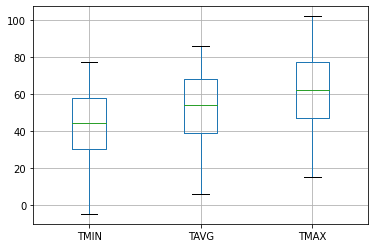

In [53]:
# Agora iremos plotar o gráfico em conjunto pelo comando plotbox das variáveis usadas:

boxplot = df4a.boxplot(column = ['TMIN', 'TAVG', 'TMAX'])
boxplot

__Letras (b), (c), (d) e (e)__ anuladas pois não existe a variável TDIFF, DATE e rating impossibilitando resoluções propostas.

In [55]:
df2.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')